Todos
- discuss how a neural network learns
- loss function
- optiimzer
- stochastic gradient descent
- learning rate, epoch and batch size
- Adam

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

model = keras.Sequential([
    layers.Dense(512, input_shape=[11]),
    layers.Activation('relu'),
    layers.Dense(512),
    layers.Activation('relu'),
    layers.Dense(512),
    layers.Activation('relu'),
    layers.Dense(1)
])

In [2]:
model.compile(
    optimizer="adam",
    loss="mae"
)

In [3]:
df = pd.read_csv('datasets/winequality-red.csv')

In [4]:
df.iloc[:, :-1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [5]:
X = df.iloc[:, :-1]
y = list(df.quality)

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [18]:
history = model.fit(
    np.array(X_train), np.array(y_train),
    validation_data=(np.array(X_valid), np.array(y_valid)),
    batch_size=512,
    epochs=70,
)

Epoch 1/70
3/3 [==============================] - 0s 37ms/step - loss: 0.4587 - val_loss: 0.4964
Epoch 2/70
3/3 [==============================] - 0s 21ms/step - loss: 0.4651 - val_loss: 0.4900
Epoch 3/70
3/3 [==============================] - 0s 20ms/step - loss: 0.4661 - val_loss: 0.5044
Epoch 4/70
3/3 [==============================] - 0s 21ms/step - loss: 0.4613 - val_loss: 0.4815
Epoch 5/70
3/3 [==============================] - 0s 21ms/step - loss: 0.4576 - val_loss: 0.5542
Epoch 6/70
3/3 [==============================] - 0s 21ms/step - loss: 0.4770 - val_loss: 0.4800
Epoch 7/70
3/3 [==============================] - 0s 22ms/step - loss: 0.4535 - val_loss: 0.4928
Epoch 8/70
3/3 [==============================] - 0s 21ms/step - loss: 0.4489 - val_loss: 0.4861
Epoch 9/70
3/3 [==============================] - 0s 21ms/step - loss: 0.4508 - val_loss: 0.5078
Epoch 10/70
3/3 [==============================] - 0s 21ms/step - loss: 0.4634 - val_loss: 0.5031
Epoch 11/70
3/3 [============

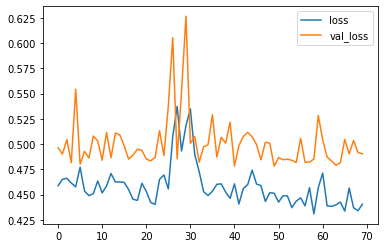

In [19]:
history_df = pd.DataFrame(history.history)
history_df.plot();

In [9]:
history_df

,loss,val_loss
0,6.639500,2.868321
1,2.776119,1.445912
2,1.726951,0.851060
3,1.156341,1.139745
4,1.087278,1.058566
...,...,...
95,0.496704,0.513092
96,0.502735,0.518219
97,0.513154,0.559823
98,0.550236,0.501998
